In [1]:
"""
Title: Simple MNIST convnet
Author: [fchollet](https://twitter.com/fchollet)
Date created: 2015/06/19
Last modified: 2020/04/21
Description: A simple convnet that achieves ~99% test accuracy on MNIST.
"""

"""
## Setup
"""

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

2023-12-04 21:37:31.133982: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 21:37:31.134021: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 21:37:31.134877: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-04 21:37:31.140817: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-04 21:37:31.950636: W tensorflow/compiler/tf2

In [2]:

"""
## Prepare the data
"""

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)    
"""
## Build the model
"""

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                 

2023-12-04 21:37:47.321583: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-04 21:37:47.353513: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-04 21:37:47.353691: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
import matplotlib.pyplot as plt

In [4]:
y_train[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [5]:
"""
## Train the model
"""

batch_size = 1000
epochs = 15


model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15


2023-12-04 21:37:58.843418: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.
2023-12-04 21:37:59.005654: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.
2023-12-04 21:37:59.658149: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-04 21:37:59.746184: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-04 21:38:00.937491: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-04 21:38:01.457849: I external/local_xla/xla/service/service.cc:168] XLA service 0x7ffa1f0061e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-04 21:38:01.457872: I external/local_xla/xla/service/service.cc:176]   StreamExecutor dev

54/54 [==============================] - 8s 68ms/step - loss: 1.1102 - accuracy: 0.6841 - val_loss: 0.2419 - val_accuracy: 0.9348
Epoch 2/15
54/54 [==============================] - 3s 64ms/step - loss: 0.2820 - accuracy: 0.9147 - val_loss: 0.1359 - val_accuracy: 0.9610
Epoch 3/15
54/54 [==============================] - 3s 65ms/step - loss: 0.1814 - accuracy: 0.9454 - val_loss: 0.0986 - val_accuracy: 0.9733
Epoch 4/15
54/54 [==============================] - 4s 65ms/step - loss: 0.1407 - accuracy: 0.9584 - val_loss: 0.0803 - val_accuracy: 0.9785
Epoch 5/15
54/54 [==============================] - 3s 64ms/step - loss: 0.1183 - accuracy: 0.9636 - val_loss: 0.0686 - val_accuracy: 0.9805
Epoch 6/15
54/54 [==============================] - 3s 64ms/step - loss: 0.1047 - accuracy: 0.9674 - val_loss: 0.0627 - val_accuracy: 0.9840
Epoch 7/15
54/54 [==============================] - 3s 64ms/step - loss: 0.0934 - accuracy: 0.9713 - val_loss: 0.0568 - val_accuracy: 0.9855
Epoch 8/15
54/54 [======

In [6]:
"""
## Evaluate the trained model
"""

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03556707501411438
Test accuracy: 0.9884999990463257


In [7]:
import matplotlib.pyplot as plt

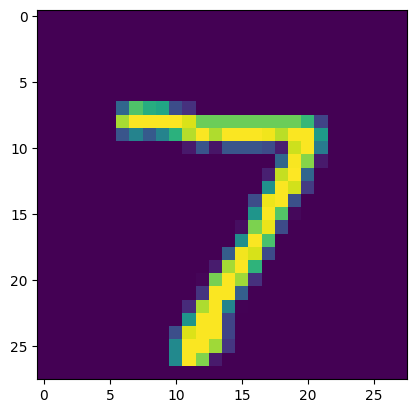

In [8]:
plt.imshow(x_test[0])
plt.show()

1/1 [==============================] - 0s 325ms/step


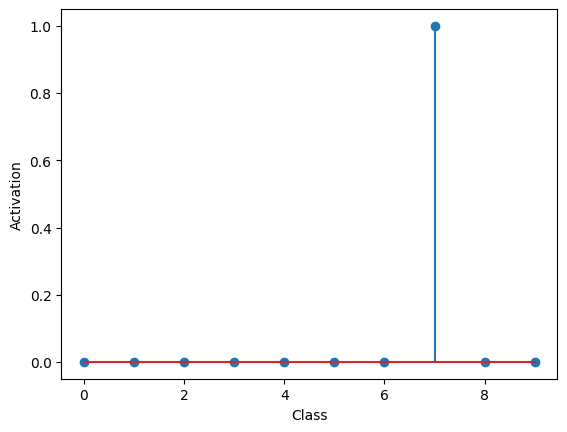

In [9]:
plt.stem(model.predict(np.array(x_test[0+np.arange(2)]))[0])
plt.xlabel("Class")
plt.ylabel("Activation")
plt.show()

In [10]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)